In [1]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'. That info is not immediately relevant to whether the funding drive was successful or not.
application_df.drop(['EIN','NAME'],axis=1,inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [5]:
# Look at APPLICATION_TYPE value counts for binning
application_df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [6]:
# Choose a cutoff value and create a list of application types to be replaced
# This is kind of arbitrary, but just looking at it, I want to ignore T13 and below since their occurrences are in the double digits and below.
# Hand jamming in the  next line.
application_types_to_replace = ["T13","T12","T2","T25","T14","T29","T15","T17"]

# Replace the types picked out above with "Other"
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure the replacement worked.
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Let's take the same process for the CLASSIFICATION value.
# First, check the value counts.
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# Definitely can't handjam that. I'd like to ignore classifications with counts of 3 digits or less.
# So I'll only keep the top 5 most frequent classifications.
classifications_to_replace=application_df['CLASSIFICATION'].value_counts().keys().tolist()[5:]

# Replace all less frequent classifications with "Other"
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to see if it worked.
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [9]:
# Convert categorical data to numeric with `pd.get_dummies`
# Categorical data includes these columns:
#   application type
#   affiliation
#   classification
#   use_case
#   organization
#   income_amt... technically
#   special_considerations

app_df_w_dummies = pd.get_dummies(application_df,columns=['APPLICATION_TYPE','AFFILIATION','CLASSIFICATION','USE_CASE','ORGANIZATION','INCOME_AMT','SPECIAL_CONSIDERATIONS'],drop_first=True)

# Take a look at the new dataframe.
app_df_w_dummies.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,1,0,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,1,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [10]:
# Split our preprocessed data into our features and target arrays. The target will be the is_successful column, with value 1 for successful and 0 for unsuccessful.
# All other columns will be features.

features_df = app_df_w_dummies.drop(columns="IS_SUCCESSFUL")

features_df.head()

,STATUS,ASK_AMT,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,ORGANIZATION_Trust,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,108590,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,6692,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,1,142590,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [11]:
targets_df = app_df_w_dummies[["IS_SUCCESSFUL"]]

targets_df.head()

,IS_SUCCESSFUL
0,1
1,1
2,0
3,1
4,1


In [12]:
# Split the preprocessed data into training and testing datasets using train_test_split.

x_train, x_test, y_train, y_test = train_test_split(features_df,targets_df)

In [13]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
x_scaler = scaler.fit(x_train)

# Scale the data
x_train_scaled = x_scaler.transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [14]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# Start up the keras model
model = tf.keras.models.Sequential()

# We'll need a dense layer for inputs, at least 1 layer for neurons (let's say 2, for fun), and an output layer.
# for the inputs... I need to know how big the feature's dataframe is
len(x_train.columns)

37

In [15]:
# There's the input dimension. Here's the input layer:
model.add(tf.keras.layers.Dense(input_dim=37,units=80,activation='relu')) # in retrospect, I maybe should've just put the len(training set columns) in this line

# The first hidden layer:
model.add(tf.keras.layers.Dense(units=30,activation='relu'))

# The second hidden layer:
model.add(tf.keras.layers.Dense(units=20,activation='relu'))

# The third hidden layer:
model.add(tf.keras.layers.Dense(units=10,activation='relu'))

# And the output layer:
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3040      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 20)                620       
                                                                 
 dense_3 (Dense)             (None, 10)                210       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,311
Trainable params: 6,311
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model
model.compile(loss="binary_crossentropy",optimizer='adam',metrics=['accuracy'])

In [17]:
# Train the model
fit_model=model.fit(x_train,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 8s 5ms/step - loss: 23818.8281 - accuracy: 0.4883
Epoch 2/100
804/804 [==============================] - 3s 4ms/step - loss: 6799.5698 - accuracy: 0.4894
Epoch 3/100
804/804 [==============================] - 3s 4ms/step - loss: 7534.0225 - accuracy: 0.4905
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 16016.7822 - accuracy: 0.4815
Epoch 5/100
804/804 [==============================] - 2s 3ms/step - loss: 792.7654 - accuracy: 0.4962
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 30.3850 - accuracy: 0.5274
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.7396 - accuracy: 0.5334
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6996 - accuracy: 0.5334
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.6916 - accuracy: 0.5334
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss

In [18]:
# Evaluate the model using the test data
model_loss, model_accuracy = model.evaluate(x_test,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.6915 - accuracy: 0.5296 - 519ms/epoch - 2ms/step
Loss: 0.6914709806442261, Accuracy: 0.5295627117156982


<Axes: >

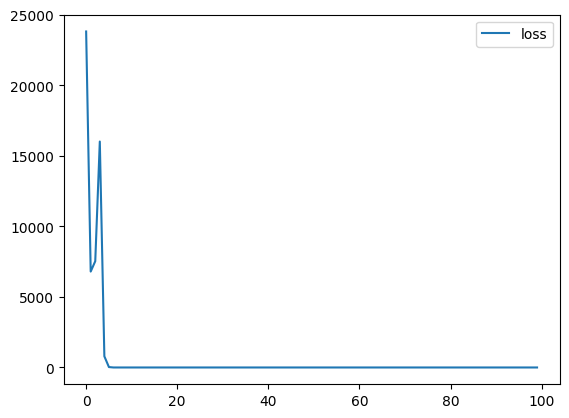

In [19]:
# I'd like to see the loss plotted out visually.
performance_df = pd.DataFrame(fit_model.history)

performance_df.plot(y="loss")

<Axes: >

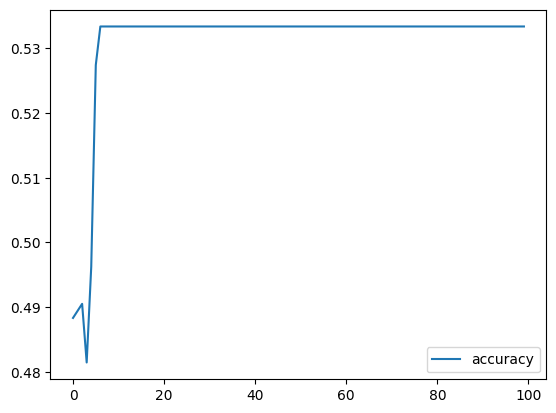

In [20]:
# Let's try the accuracy too.
performance_df.plot(y="accuracy")

Notes: I did futz with the model a little bit. I started with 2 hidden layers each with 20 units with sigmoid activations all the way down, and I tried out 200 epochs, and wandered around adding bits to see what would happen. It didn't actually do much to the loss and accuracy.

In [22]:
# I guess that's as good as we're going to get.
# Export the model to HDF5 file
model.save("AlphabetSoupCharity_Optimization.h5")